# Philly Weather Data for 2021

In this project I used The Pennsylvania State Climatologists website which has daily weather archives dating back to 1948.<br />[PA Weather Data](http://www.climate.psu.edu/data/city_information/index.php?city=phl&page=dwa&type=big7)

In [54]:
#import some packages
import pandas as pd
import matplotlib.pyplot as plt

We will use Pandas and the PA Weather Data link to scrub the data from the 2021 table.<br/>
We first set a variable called 'dframes' to read and store the html. Luckily Pandas will automatically look for the 'Table' class in html. If there are multiple tables on the page we can count them from the top of the page starting from 0. On this page there is only one table so 'dframes[0]' will do.
Save the extracted data as a csv.


In [3]:
url = 'http://www.climate.psu.edu/data/city_information/index.php?city=phl&page=dwa&type=big7'

dframes = pd.read_html(url)

df2021 = dframes[0]

#df2021.to_csv('Weather2021.csv')

In [55]:
dset = pd.read_csv('datas/Weather2021.csv') #pandas function to read csv
df = pd.DataFrame(dset).fillna(0) #Creates a dataframe and fills all NaN values with zero.
df.dtypes  #Shows the variable type of each col.
df  #Shows the dataframe

,inx,Date,HighTemp.,LowTemp.,AvgTemp.,TempDeparture,HDD,CDD,GDD,AvgDewpoint,AvgRH,AvgWind Speed,AvgWind Dir,AvgPress,TotalPrecip,# obs
0,0,2021-12-26,56,42,50,14,15,0,0,35,58,10,315,1013.1,0,24
1,1,2021-12-25,58,42,50,13,15,0,0,44,82,6,164,1002.8,0.65,24
2,2,2021-12-24,51,36,43,6,22,0,0,29,58,4,99,1016.8,Trace,24
3,3,2021-12-23,40,29,34,-3,31,0,0,16,46,9,249,1021.9,0,24
4,4,2021-12-22,49,34,41,4,24,0,0,26,59,12,309,1007.7,0.16,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,353,2021-01-05,41,39,40,6,25,0,0,31,69,5,227,1013.7,0,24
354,354,2021-01-04,43,35,39,4,26,0,0,33,80,7,282,1015.2,0.01,24
355,355,2021-01-03,39,35,37,2,28,0,0,33,85,10,96,1015.8,0.19,24
356,356,2021-01-02,53,38,45,10,20,0,0,37,77,10,211,1014.3,0.02,24


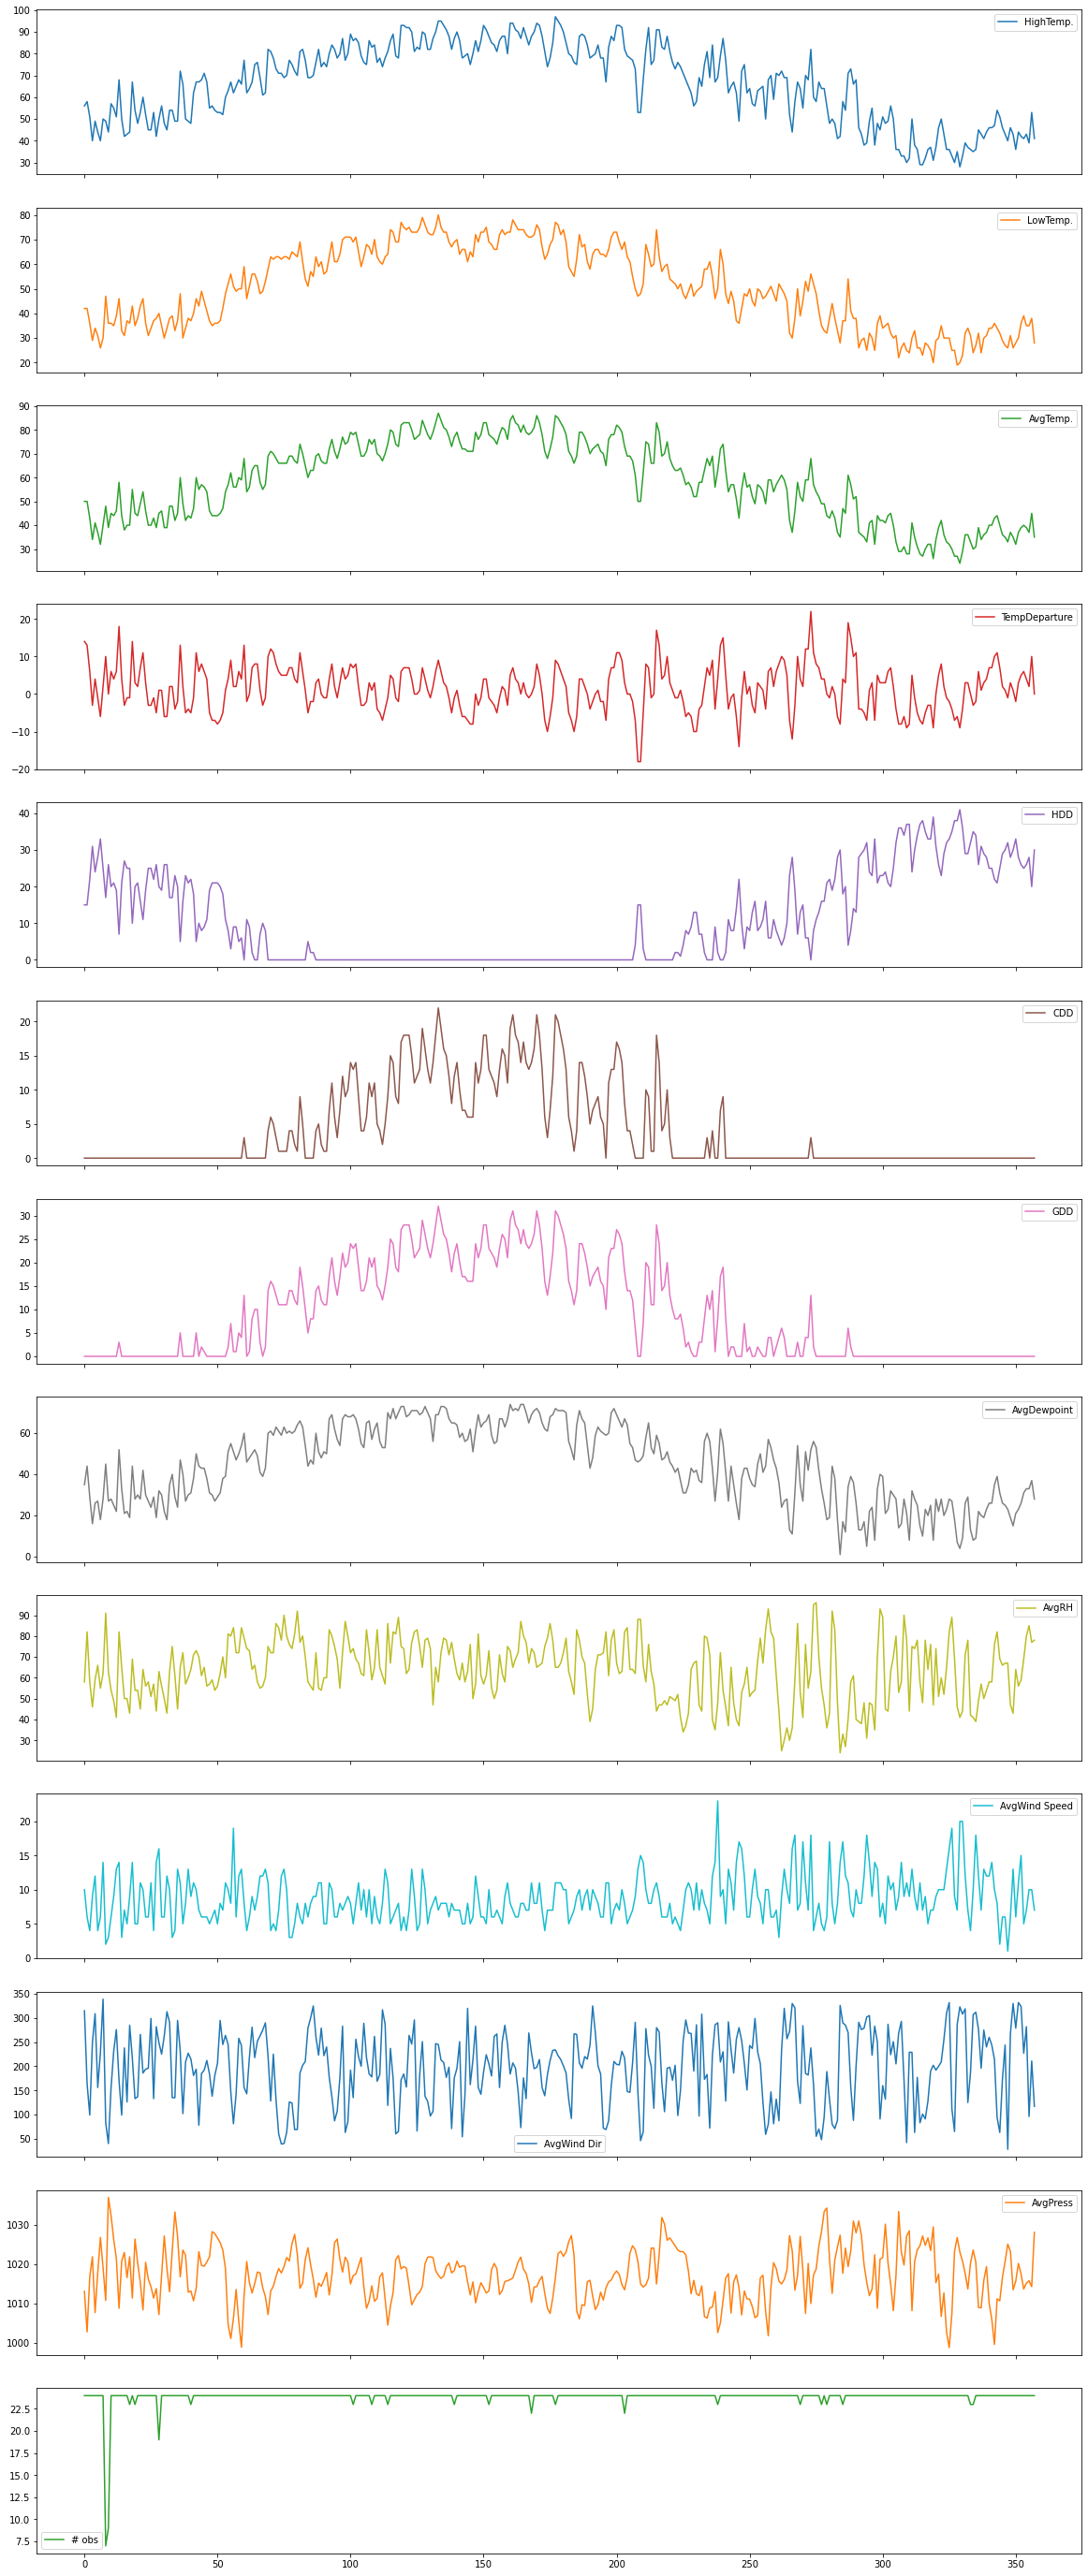

In [70]:
#Drop the index column and plot the entire data set into subplots. 
cleandf = df.drop(columns=['inx'])
fig = cleandf.plot(subplots=True, figsize=(20,50))

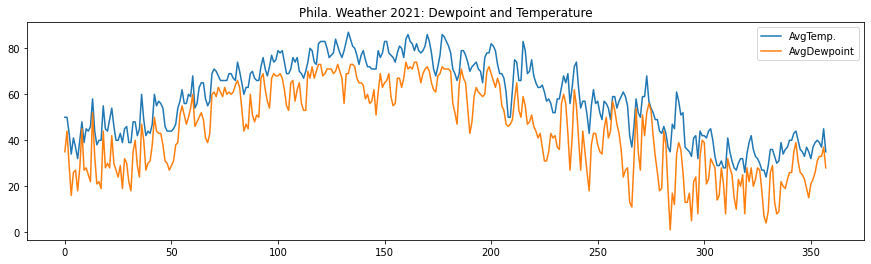

In [16]:
#Get specific conditions and compare them. 
axs = df[['AvgTemp.','AvgDewpoint']].plot(figsize=(15, 4))
axs.title.set_text('Phila. Weather 2021: Dewpoint and Temperature')

In [71]:
#Removing 'Trace' from Precip. Column and replace with 0
df = df.replace(['Trace'],0)
df.TotalPrecip.value_counts()

0       245
0.01     12
0.16      6
0.07      6
0.03      6
       ... 
0.30      1
0.12      1
0.57      1
1.53      1
0.82      1
Name: TotalPrecip, Length: 61, dtype: int64

In [12]:
#Made a new dataframe with Date and Total Precip
#The TotalPrecip has a int64 data type but needs to be changed to float
newdf = df[["Date","TotalPrecip"]]
df['TotalPrecip']=df['TotalPrecip'].astype(float)

Unnamed: 0              130
Date             2021-08-16
HighTemp.                82
LowTemp.                 72
AvgTemp.                 76
TempDeparture            -1
HDD                       0
CDD                      11
GDD                      21
AvgDewpoint              67
AvgRH                    74
AvgWind Speed             7
AvgWind Dir              97
AvgPress             1021.9
TotalPrecip           22.18
# obs                    24
Name: 130, dtype: object

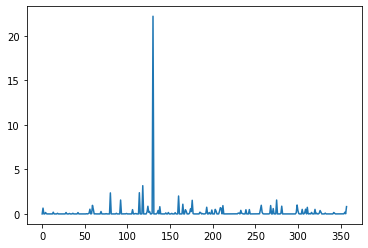

In [13]:
#Plot Precipiation vs Day
#We can see that on 8/16/2021 it rained the most 
ax = df["TotalPrecip"].plot(subplots=True)
column = df["TotalPrecip"]
max_index = column.idxmax()
df.iloc[130]

In [ ]:
#It looks like there is an error in this data. Check the site where the data was scrubbed.
#Row 130, Date: 2021-08-16 says TotalPrecip 22.18" that is almost as much as the entire years precip. in philly. 
#Did I(BK) find a typo in this data?
#Other places says it rained between 2.24 inches and 3 inches that day. 